In [1]:
import pandas as pd
import nltk

In [2]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ALAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

Remove Punctuations

In [3]:
import re
remove_punct = [re.sub(r'[^\w\s]','',word) for text in gutenberg.fileids() for word in nltk.corpus.gutenberg.words(text)]


Remove Stop Words

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def remove_stop_word(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return content

In [6]:
gut_unstop = remove_stop_word(remove_punct)
#gut_unstop

Stemming the text

In [7]:
from __future__ import print_function
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [8]:
import re
def tokenize_and_stem(text):
        filtered = []

        # filter out numeric tokens, raw punctuation, etc.
        for token in text:
            if re.search('[a-zA-Z]', token):
                filtered.append(token)
        stems = [stemmer.stem(t) for t in filtered]
        return stems 

In [9]:
 gutenberg_words = tokenize_and_stem(gut_unstop)

Total Words of the Corpus

In [10]:
len(gutenberg_words)

1026109

Number of non processing words

In [11]:
num_words = 0
for fileid in gutenberg.fileids():
    num_words = num_words + len(gutenberg.words(fileid))
print(num_words)

2621613


Number of distinct words

In [12]:
len(set(gutenberg_words))

25852

Number of distinct words non process

In [13]:
num_dist_words = 0
for fileid in gutenberg.fileids():
    num_dist_words += len(set(gutenberg.words(fileid)))
print(num_dist_words)

136632


In [14]:
fdist = nltk.FreqDist(gutenberg_words)
len(fdist)

25852

In [15]:
sorted_corpus = sorted(fdist.items(), key=lambda x:x[1], reverse=True)

In [ ]:
'''word_freq = [gutenberg_words.count(w) for w in gutenberg_words]
gut_word_freq = dict(zip(gutenberg_words, word_freq))'''

In [ ]:
'''print(gut_word_freq)'''

Most common words

In [16]:
#sorted_corpus = sorted(word_freq.items(), key=lambda x:x[1], reverse=True)
num_1_word = 0
i = 0
while(num_1_word < num_words/2 and i < len(sorted_corpus)):
    num_1_word += sorted_corpus[i][1]
    i += 1

print('The number of unique words that represent half of the total words in the corpus:', i)
            

The number of unique words that represent half of the total words in the corpus: 25852


The 200 highest frequency words in this corpus.

In [17]:
gut_200 = sorted_corpus[:200]

In [18]:
import matplotlib.pyplot as plot

In [22]:
gut_df = pd.DataFrame(gut_200)
gut_df.columns = ['words', 'freq']
print(gut_df)

        words   freq
0       shall  11682
1        said   9434
2        unto   9010
3        lord   8671
4        thou   6759
5         one   6408
6         god   5673
7         man   5644
8         thi   5609
9          ye   5037
10       thee   4807
11        say   4747
12        day   4616
13       upon   4587
14       come   4484
15      would   4046
16      thing   3951
17        son   3945
18       like   3861
19      could   3594
20       king   3574
21       hand   3539
22       know   3428
23         go   3340
24       came   3337
25        see   3276
26       time   3189
27       hous   3163
28       good   3076
29      littl   3069
..        ...    ...
170    believ    952
171    toward    950
172      door    947
173     light    947
174       far    946
175      fire    945
176      sent    944
177    someth    942
178      morn    940
179     whole    938
180      mind    933
181     stood    931
182      half    928
183      hope    927
184   thereof    920
185      gave

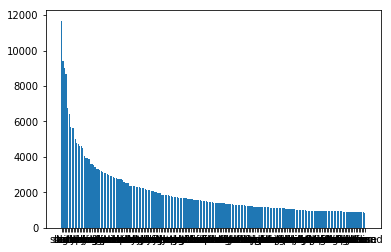

In [27]:
plot.bar(x=gut_df.words, height=gut_df.freq)
plot.show()

Zipf’s Law states that the frequency of a word in a corpus of text is proportional to it’s rank 

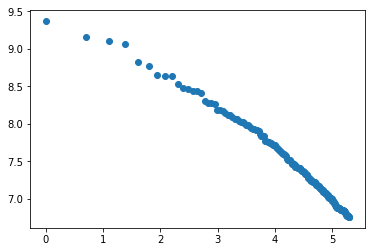

In [33]:
import math
plot.scatter(x=[math.log(c) for c in gut_df.index+1], y=[math.log(c) for c in gut_df.freq])
plot.show()

The  observed frequency follow the zip law by the diagonal fiigure on log-log coodinates we observe above.

In this corpus the frequecies of the most important words give the theme of the text.
This corpora reflect the most common terms that appear in the christian bilbe.

Lexical diversity

In [ ]:
print(int(num_words/num_dist_words))

In [ ]:
fdist = nltk.FreqDist([word for word in gutenberg.words(fileid)])
len(fdist)

In [ ]:
#sorted_corpus

Most Frequent words

In [ ]:
def lexical_diversity(text):
    return len(text) / len(set(text))

In [ ]:
def percentage(count, total):
    return 100 * count / total